Identify data and document sources for the following variables at the most detailed geography:

- school capacity
- race by age by unit (unit is block, block group, tract)
- actual school catchment (boundaries)

# School capactiy (enrollment)

the CCD provides [data for the 2018-2019 school year](https://nces.ed.gov/ccd/files.asp#Fiscal:2,LevelId:7,SchoolYearId:33,Page:1) containing the count of students in a school broken down by **grade, race, and sex** for 2018-2019 ([direct download link](https://nces.ed.gov/ccd/data/zip/ccd_sch_052_1819_l_1a_091019.zip)). These counts can be summed to get the total enrollment in a school. The schools are identified by their name, their LEAID and their NCESSCHID, which can all be used to match to other datasets. 

**Extract the csv to `data` and rename to `ccd_enrollment_1819`**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
df = pd.read_csv("data/ccd_enrollment_1819.csv")
# over 2GB, be sure to gitignore this out

In [3]:
df.columns

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'SCH_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'ST_SCHID', 'NCESSCH',
       'SCHID', 'GRADE', 'RACE_ETHNICITY', 'SEX', 'STUDENT_COUNT',
       'TOTAL_INDICATOR', 'DMS_FLAG'],
      dtype='object')

In [4]:
df.shape
# almost 12 million 

(11948167, 18)

In [5]:
df.head(25)

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
0,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,American Indian or Alaska Native,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
1,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,American Indian or Alaska Native,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
2,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Asian,Female,1.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
3,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Asian,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
4,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Black or African American,Female,9.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
5,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Black or African American,Male,7.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
6,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Hispanic/Latino,Female,101.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
7,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Hispanic/Latino,Male,103.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
8,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Native Hawaiian or Other Pacific Islander,Female,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
9,2018-2019,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,10000500870,100870,Grade 7,Native Hawaiian or Other Pacific Islander,Male,0.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


In [6]:
df['TOTAL_INDICATOR'].unique()
# not sure if this matters

array(['Category Set A - By Race/Ethnicity; Sex; Grade',
       'Derived - Education Unit Total minus Adult Education Count',
       'Derived - Subtotal by Race/Ethnicity and Sex minus Adult Education Count',
       'Education Unit Total', 'Subtotal 4 - By Grade'], dtype=object)

We want to squish all the categories of students down so that we have one row per school indicating total enrollment.

In [7]:
# test = df.groupby(by=df.columns, axis=1).sum()

# this operation should squish it down
# but the file is large, so executing 
# blue screened my computer!

### Alternate source: Urban Institute

The enrollment data can also be obtained through the Urban Institute API, assuming we have geographic data of the schools indexed by the school's `LEAID`

This may prove more or less convinient/reliable. Urban has presumably processed data from the CCD, which could cause problems for merging. On the other hand it might be more convinient to pull/organize the data programatically through the API.

In [8]:
from json import loads
from urllib.request import urlopen

In [9]:
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/enrollment/2018/grade-8/"

In [10]:
response = urlopen(url)
data = loads(response.read())
data = pd.DataFrame.from_dict(data)
dfdict = dict(data['results'])
data = pd.DataFrame.from_dict(dfdict, orient='index')
# clean this up later

In [11]:
data.head()

,year,leaid,fips,grade,race,sex,enrollment
0,2018,0100002,1,8,99,99,NaN
1,2018,0100005,1,8,99,99,403.0
2,2018,0100006,1,8,99,99,463.0
3,2018,0100007,1,8,99,99,1076.0
4,2018,0100008,1,8,99,99,900.0


# Catchment (attendance boundaries)

In [22]:
import geopandas as gpd
import matplotlib as plt

come courtesy of the [School Attendance Boundary Survey (SABS)](https://nces.ed.gov/programs/edge/SABS). See also the [documentation](https://nces.ed.gov/programs/edge/docs/EDGE_SABS_2015_2016_TECHDOC.pdf);

>Unassigned areas – All un-populated areas that were not covered by a school attendance area were
classified as “unassigned.” These included airports, parks, water bodies, and various other unique types
of land use. 

In [13]:
attbound = gpd.read_file("data/nces_att_bound/SABS_1516/SABS_1516.shp")
# 15-16 (not the same data year)

In [14]:
attbound.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


<AxesSubplot:>

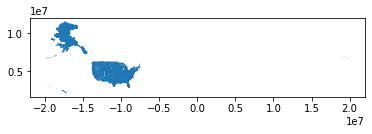

In [15]:
attbound.plot()

In [16]:
attbound.shape

(75128, 14)

In [17]:
attbound.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# School geolocation

NCES also publishes a Education Demographics and Geographic Estimates (EDGE) page, which contains a dataset with the addresses of schools as reported by the CCD as a shapefile. School year 18-19 is the most recent data year. [download location](https://nces.ed.gov/programs/edge/Geographic/SchoolLocations)

**Save the shapefile directory in `data/edge_geocode/Shapefile_SCH/` (gitignored).**

In [18]:
gdf = gpd.read_file("data/edge_geocode/Shapefile_SCH/EDGE_GEOCODE_PUBLICSCH_1819.shp")

In [19]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [31]:
gdf = gdf.to_crs(epsg=3857)

<AxesSubplot:>

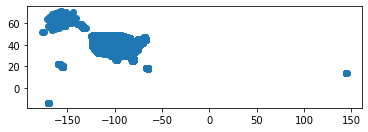

In [20]:
gdf.plot()

In [21]:
gdf.head()
# Albertville on top again 

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.260194,-86.206174,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20617 34.26019)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.262226,-86.204884,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.20488 34.26223)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,Marshall County,32,34.273318,-86.220144,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22014 34.27332)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,Marshall County,32,34.252700,-86.221806,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.22181 34.25270)
4,010000501616,0100005,Big Spring Lake Kindergarten School,01,257 Country Club Rd,Albertville,AL,35951,01,01095,Marshall County,32,34.289849,-86.193289,10700,"Albertville, AL",2,290,"Huntsville-Decatur-Albertville, AL",N,N,0104,01026,01009,2018-2019,POINT (-86.19329 34.28985)


# California

In [25]:
caenroll = df.loc[df['ST'] == 'CA']

In [27]:
caatt = attbound.loc[attbound['stAbbrev'] == 'CA']

In [32]:
caloc = gdf.loc[gdf['STATE'] == 'CA']

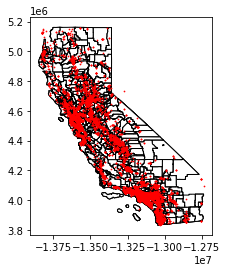

In [38]:
base = caatt.plot(color='white', edgecolor='black')
caloc.plot(ax=base, marker='o', color='red', markersize=.5);